# Paintings

Imports for the project :

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import PIL
from tensorflow.image import resize

# Load data and display images

In [22]:
# Check if data folder ok
! ls

 data					    ' Paintings.ipynb'
 paintings_denoising_lyrics_detector.ipynb   README.md


In [54]:
# Paths and names of images
import glob
dataset_paths = glob.glob('./data/*.jpg')
dataset_paths

['./data/Kazimir_Malevich_13.jpg',
 './data/Jan_van_Eyck_15.jpg',
 './data/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './data/Edgar_Degas_271.jpg',
 './data/Albrecht_DuÌ\x88rer_244.jpg',
 './data/Edgar_Degas_228.jpg',
 './data/Marc_Chagall_101.jpg',
 './data/Leonardo_da_Vinci_50.jpg',
 './data/Henri_Matisse_186.jpg',
 './data/Edgar_Degas_538.jpg',
 './data/Edgar_Degas_516.jpg',
 './data/Diego_Rivera_3.jpg',
 './data/Francisco_Goya_87.jpg',
 './data/Francisco_Goya_278.jpg',
 './data/Francisco_Goya_43.jpg',
 './data/Rembrandt_145.jpg',
 './data/Mikhail_Vrubel_99.jpg',
 './data/Alfred_Sisley_150.jpg',
 './data/Leonardo_da_Vinci_72.jpg',
 './data/Amedeo_Modigliani_52.jpg',
 './data/Francisco_Goya_155.jpg',
 './data/Albrecht_DuÌ\x88rer_301.jpg',
 './data/Eugene_Delacroix_28.jpg',
 './data/Albrecht_Duâ\x95\xa0Ãªrer_158.jpg',
 './data/Alfred_Sisley_136.jpg',
 './data/Rembrandt_253.jpg',
 './data/Albrecht_DuÌ\x88rer_129.jpg',
 './data/Edgar_Degas_68.jpg',
 './data/Albrecht_DuÌ\x88rer_316.jpg'

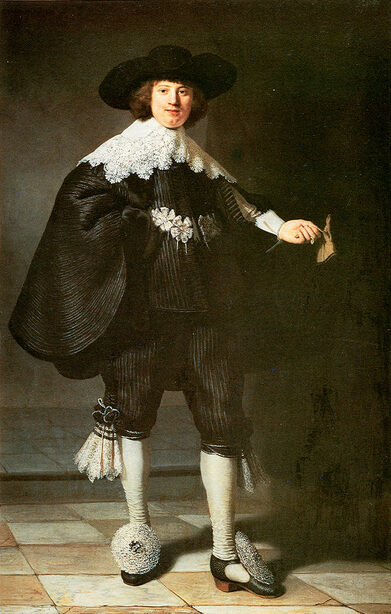

In [55]:
# Display of one image
img = PIL.Image.open(dataset_paths[15])
img

In [56]:
# Image shape
img_shape = np.shape(img)
img_shape

(614, 391, 3)

In [57]:
# Image dimension
img_dim = np.array(img).ndim
img_dim

3

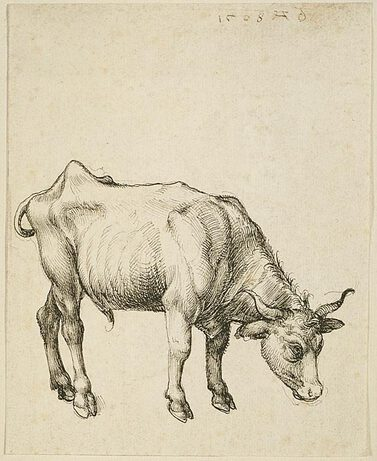

In [58]:
# Display of an other image
img2 = PIL.Image.open(dataset_paths[35])
img2

In [59]:
# Image shape
img_shape = np.shape(img2)
img_shape

(461, 377, 3)

# Processing

In [60]:
# Check types
type(dataset_paths), type(dataset_paths[15])

(list, str)

In [66]:
# Create list of ndarray
dataset_img = []
for i in range(len(dataset_paths)):
    img = PIL.Image.open(dataset_paths[i])
    dataset_img.append(np.asarray(img))
    
type(dataset_img), type(dataset_img[15])

(list, numpy.ndarray)

In [67]:
dataset_img[:5]

[array([[[154, 156, 132],
         [159, 161, 137],
         [183, 187, 162],
         ...,
         [ 86, 102, 118],
         [ 51,  67,  83],
         [ 84, 101, 121]],
 
        [[150, 152, 130],
         [157, 161, 136],
         [187, 191, 168],
         ...,
         [ 67,  80,  97],
         [ 80,  96, 112],
         [ 61,  76,  95]],
 
        [[150, 153, 132],
         [118, 123, 100],
         [109, 114,  92],
         ...,
         [ 74,  87, 103],
         [ 91, 104, 121],
         [ 52,  65,  82]],
 
        ...,
 
        [[211, 190, 163],
         [249, 230, 200],
         [181, 164, 134],
         ...,
         [155, 139, 126],
         [150, 133, 126],
         [164, 146, 146]],
 
        [[198, 176, 152],
         [201, 181, 154],
         [195, 178, 150],
         ...,
         [166, 150, 137],
         [157, 140, 133],
         [166, 148, 148]],
 
        [[221, 199, 175],
         [226, 206, 181],
         [240, 223, 195],
         ...,
         [183, 167, 154],
  

In [68]:
# Check des len
len(dataset_img), len(dataset_paths)

(498, 498)

In [69]:
dataset_img[15].ndim

3

## Reshape, resize, rescale

In [71]:
# Warning : we have colored and non colored images => Convert all images in colored ones
dataset_img = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in dataset_img]
set([x.ndim for x in dataset_img])

{3}

In [72]:
len(dataset_img)

498

In [75]:
dataset_img[15].shape

(614, 391, 3)

In [79]:
# Resize image (height=120 pixels, width=100 pixels)
resize(dataset_img[15], [120, 100]).shape.as_list()

[120, 100, 3]

In [82]:
dataset_resized = []
for i in dataset_img:
    dataset_resized.append(resize(i, [120, 100]))

dataset_resized[25].shape

TensorShape([120, 100, 3])

In [84]:
# Convert in ndarray & check shape
dataset_resized = np.array(dataset_resized)
dataset_resized.shape

(498, 120, 100, 3)

In [85]:
dataset_resized

array([[[[156.405   , 160.235   , 135.49    ],
         [171.355   , 176.355   , 153.355   ],
         [102.125   , 110.275   ,  92.85    ],
         ...,
         [ 77.849976,  90.42499 , 100.69995 ],
         [ 64.31506 ,  78.06006 ,  91.82507 ],
         [ 78.38516 ,  94.30017 , 110.555145]],

        [[130.025   , 138.855   , 119.94    ],
         [110.665   , 121.92    , 104.155   ],
         [ 80.725   ,  94.3     ,  78.45    ],
         ...,
         [ 67.87506 ,  81.45007 ,  90.45007 ],
         [ 62.97998 ,  72.97998 ,  83.48999 ],
         [ 65.67993 ,  75.67993 ,  87.67993 ]],

        [[106.020004, 121.765   , 111.85    ],
         [ 74.630005,  90.630005,  80.630005],
         [ 63.950005,  82.675   ,  74.100006],
         ...,
         [ 57.950317,  71.52533 ,  80.52533 ],
         [ 85.39514 ,  94.39514 , 102.88513 ],
         [122.70523 , 129.45026 , 137.53525 ]],

        ...,

        [[245.875   , 226.705   , 193.875   ],
         [221.51    , 211.745   , 169.51    ]

In [86]:
# Scale images (scaled values should be between  0  and  1)
dataset_scaled = dataset_resized / 255
dataset_scaled

array([[[[0.61335295, 0.62837255, 0.5313333 ],
         [0.6719804 , 0.6915882 , 0.60139215],
         [0.4004902 , 0.43245098, 0.36411765],
         ...,
         [0.305294  , 0.3546078 , 0.39490178],
         [0.25221592, 0.30611786, 0.36009833],
         [0.3073928 , 0.3698046 , 0.43354958]],

        [[0.50990194, 0.5445294 , 0.47035295],
         [0.4339804 , 0.47811764, 0.40845096],
         [0.3165686 , 0.36980394, 0.30764705],
         ...,
         [0.2661767 , 0.31941205, 0.35470617],
         [0.24698031, 0.286196  , 0.32741174],
         [0.25756836, 0.29678404, 0.34384286]],

        [[0.41576472, 0.4775098 , 0.43862745],
         [0.29266667, 0.3554118 , 0.31619608],
         [0.25078434, 0.3242157 , 0.29058826],
         ...,
         [0.22725615, 0.2804915 , 0.31578562],
         [0.33488292, 0.37017703, 0.4034711 ],
         [0.48119697, 0.50764805, 0.5393539 ]],

        ...,

        [[0.9642157 , 0.8890392 , 0.76029414],
         [0.86866665, 0.8303725 , 0.6647451 ]

## Create X, y